In [48]:
import numpy as np
import pandas as pd
import math

from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,9)

## PCA(Principal Component Analysis)

Principal component analysis (PCA) is a technique that transforms high-dimensions data into lower-dimensions while retaining as much information as possible.


In [2]:
from sklearn.decomposition import PCA

## Iris

In [4]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
header=iris.feature_names
df=pd.DataFrame(x,columns=header)
df['target']=y

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
Pca=PCA(n_components=2, whiten=True) #whiten= normalize 

n_componentsint: float or ‘mle’, default=None

Number of components to keep. if n_components is not set all components are kept:
n_components == min(n_samples, n_features)

If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. 

Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

If svd_solver == 'arpack', the number of components must be strictly less than the minimum of n_features and n_samples.

Hence, the None case results in: n_components == min(n_samples, n_features) - 1

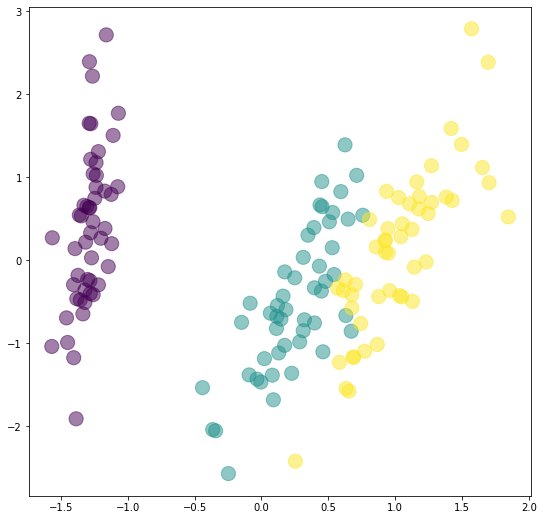

In [18]:
data=Pca.fit_transform(x)
plt.scatter(data[:,0],data[:,1],c=y,s=200,alpha=0.5)


The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [11]:
print('variance ratio:',Pca.explained_variance_ratio_)
print('sum:',sum(Pca.explained_variance_ratio_))

variance ratio: [0.92461872 0.05306648]
sum: 0.977685206318795


1st principal component contains  92.7% of the variance 2nd one contains 5% variance, over all, 97.7% of variance, this means 97.7% the information conserved.

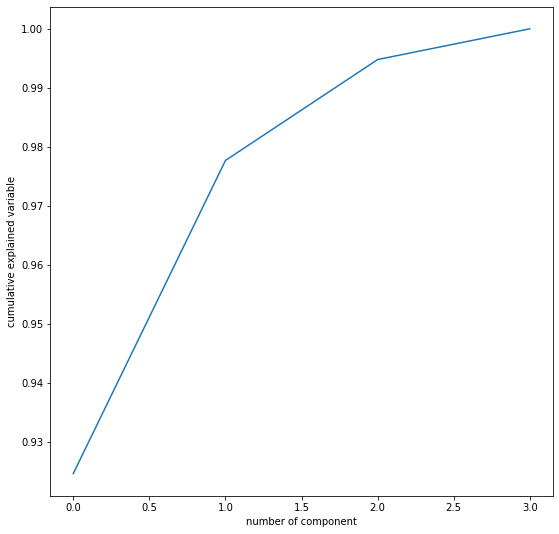

In [14]:
pca=PCA(whiten=True).fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('cumulative explained variable')
plt.show()

## Digits

In [26]:
digits=datasets.load_digits()
imgs=digits['data']
np.shape(imgs)


(1797, 64)

lets pick a random image.

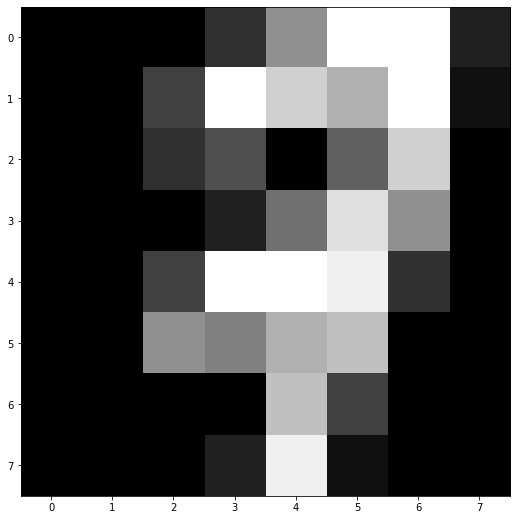

In [32]:
i=np.random.randint(len(imgs[:,0]))
plt.imshow(digits['data'][i].reshape((8,8)), cmap='gray')

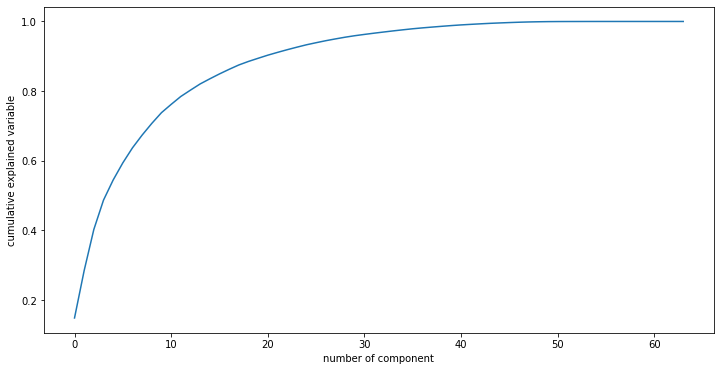

In [122]:
digitpca=PCA().fit(digits['data'])
plt.plot(np.cumsum(digitpca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('cumulative explained variable')
plt.show()

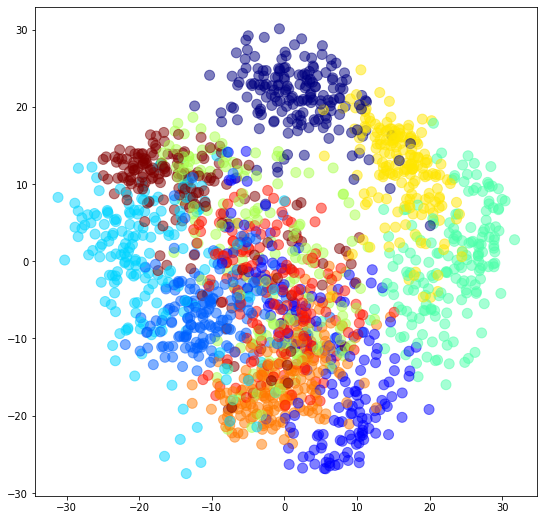

In [35]:
digitmodel=PCA(n_components=10)
data = digitmodel.fit_transform(digits['data'])
plt.scatter(data[:,0],data[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.5)

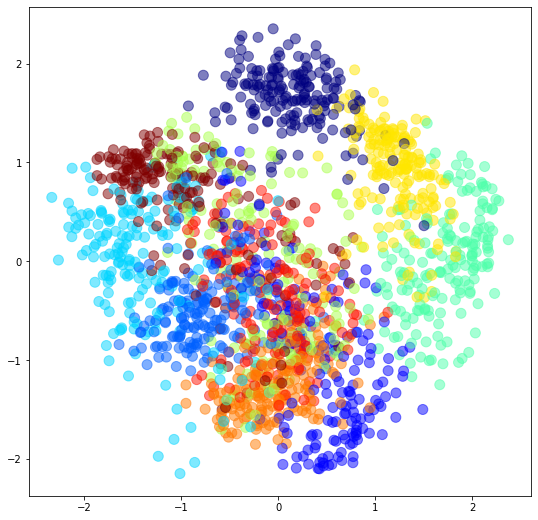

In [38]:
digitmodel2=PCA(n_components=15,whiten=True)
data2 = digitmodel2.fit_transform(digits['data'])
plt.scatter(data2[:,0],data2[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.5)

In [37]:
print('variance ratio:',digitmodel.explained_variance_ratio_)
print('sum:',sum(digitmodel.explained_variance_ratio_))

variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782414 0.04916908
 0.04315985 0.03661363 0.03353212 0.03078786]
sum: 0.7382260669504549


In [39]:
print('variance ratio:',digitmodel2.explained_variance_ratio_)
print('sum:',sum(digitmodel2.explained_variance_ratio_))

variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661372 0.03353248 0.03078805 0.0237229  0.0227269
 0.01821784 0.01773778 0.01466578]
sum: 0.8352979423281335


variance ratio: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409712 0.01318588 0.01248136
 0.01017712 0.00905591 0.00889482 0.00797066 0.00767485 0.00722853
 0.00695826]
sum: 0.9330298379391757


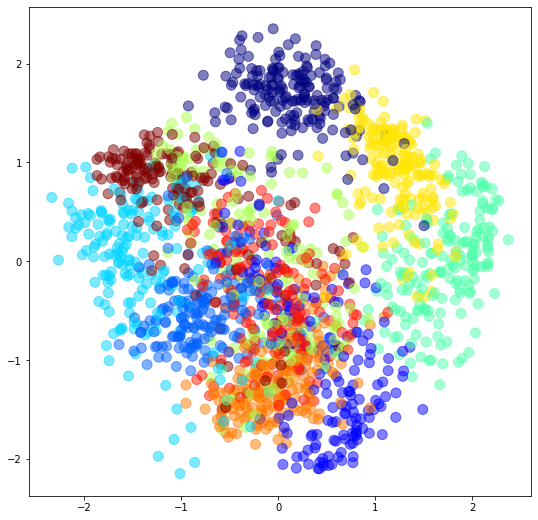

In [40]:
digitmodel3=PCA(n_components=25,whiten=True)
data3 = digitmodel3.fit_transform(digits['data'])
plt.scatter(data3[:,0],data3[:,1],c=digits['target'],cmap='jet',s=100,alpha=0.5)
print('variance ratio:',digitmodel3.explained_variance_ratio_)
print('sum:',sum(digitmodel3.explained_variance_ratio_))

another example,

In [52]:
digitdata=datasets.load_digits()
digitx=digitdata['data']
digity=digitdata['target']

In [54]:
np.shape(digitx)
#np.shape(digity)

(1797, 64)

In [55]:
digitmodel4=PCA(.95)
###Notice the code below has .95 for the number of components parameter.
# It means that scikit-learn choose the minimum number of principal 
# components such that 95% of the variance is retained.
X_data=digitmodel4.fit_transform(digitx)


In [93]:
digitmodel4.n_components_

29

I was 64 before, now we are runing data with 29

In [59]:
approximation = digitmodel4.inverse_transform(X_data)

it takes a data point from the reduced space, and takes it back(with information loss, of course) to the original space.

Text(0.5, 1.0, '95% of Explained Variance')

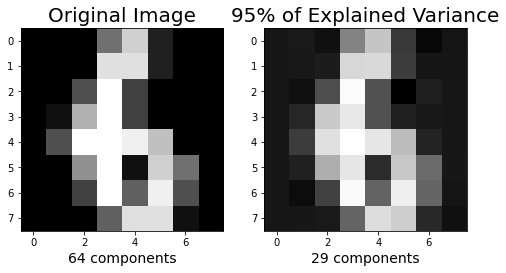

In [79]:
i=np.random.randint(len(digitx[:,0]))
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(digitx[i].reshape((8,8)), cmap='gray')
plt.xlabel('64 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

plt.subplot(1, 2, 2)
plt.imshow(approximation[i].reshape((8,8)), cmap='gray')
plt.xlabel('29 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)


# Olivetti Face Dataset

In [80]:
faces = datasets.fetch_olivetti_faces()
faces['data'].shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/ugur/scikit_learn_data


(400, 4096)

In [95]:
facemodel=PCA(.95)

data=facemodel.fit_transform(faces['data'])


In [97]:
facemodel.n_components_

123

In [99]:
approximation=facemodel.inverse_transform(data)

Text(0.5, 1.0, '95% of Explained Variance')

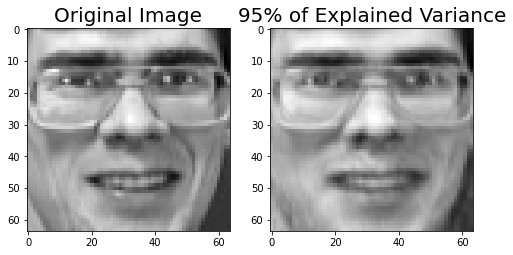

In [100]:
plt.figure(figsize=(8,4))
i=np.random.randint(len(faces['data'][:,0]))
plt.imshow(faces['data'][i,:].reshape((64,64))  )
plt.subplot(1, 2, 1)
plt.imshow(faces['data'][i].reshape((64,64)), cmap='gray')
plt.title('Original Image', fontsize = 20)

plt.subplot(1, 2, 2)
plt.imshow(approximation[i].reshape((64,64)), cmap='gray')
plt.title('95% of Explained Variance', fontsize = 20)


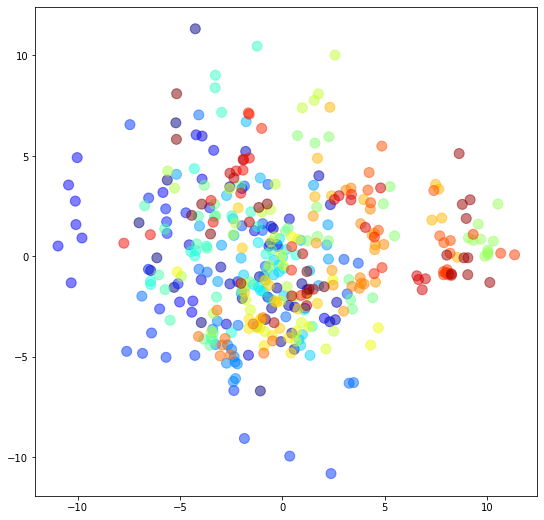

In [101]:
plt.scatter(data[:,0],data[:,1],c=faces['target'],cmap='jet',s=100,alpha=0.5)

# Time series

In [103]:
ts = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx')


/home/ugur/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


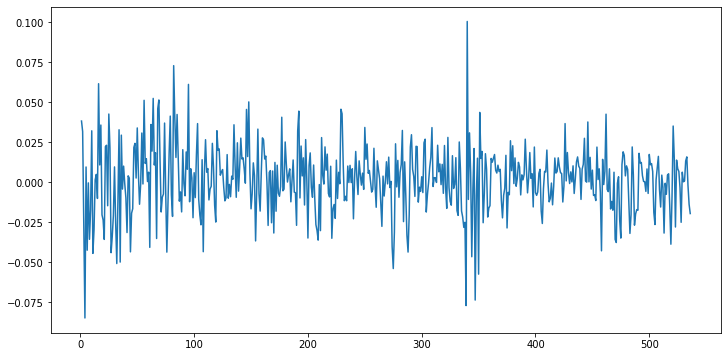

In [104]:
plt.rcParams['figure.figsize'] = 12,6
plt.plot(ts['USD BASED'][1:])

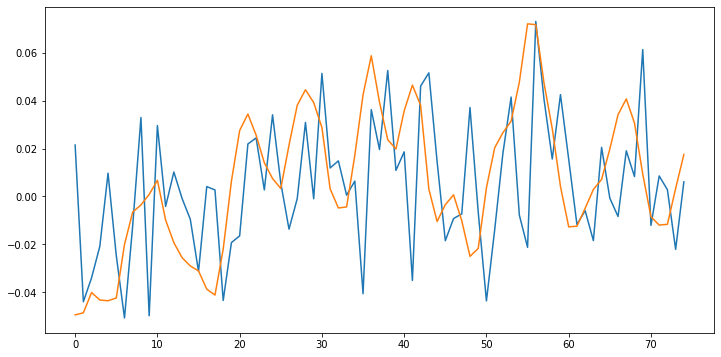

In [119]:
N = ts.shape[0]
m = 5

imkb = np.array([ts[i:i+m]['USD BASED'] for i in range(1,N-m)])
model = PCA(n_components=1)
data = model.fit_transform(imkb)
plt.plot(imkb[25:100,0])
plt.plot(data[25:100,0])

In [120]:
sum(model.explained_variance_ratio_)

0.22207549402498156

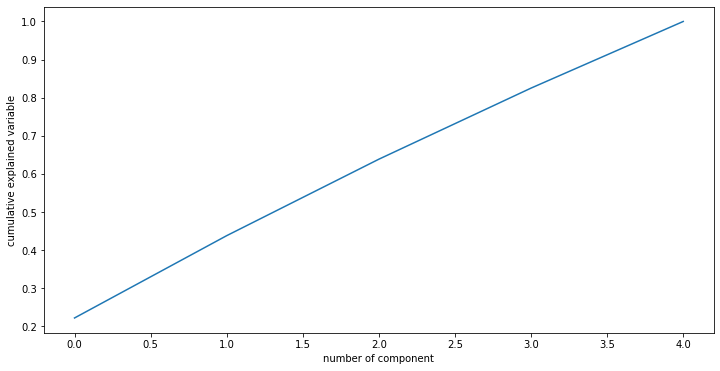

In [124]:
modelpca=PCA().fit(imkb)
plt.plot(np.cumsum(modelpca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('cumulative explained variable')
plt.show()